In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Подключаем библиотеки 

# 1. Методы ближайших соседей

1.1 Подключитесь к набору данных. Разберитесь в том, как устроен датасет и какова постановка задачи.

In [3]:
#Загрузка данных
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Статистика по числовым признакам
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Датасет состоит из данных маркетингового банка(возраст клиента, образование, баланс и тд). Target переменная - deposit. Цель прогнозной модели - проанализировать данные и выяснить внесет ли человек депозит

1.2 Извлеките целевой признак (target). Какая из задач обучения с учителем рассматривается –– классификация или регрессия?

In [6]:
df['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

Целевой признак (target) - deposit.
    Задача обучения - классификация, так как имеет конечное количество ответов("да" или "нет")

1.3 Каково распределение значений target-переменной? Постройте подходящую визуализацию. Прокомментируйте результат.

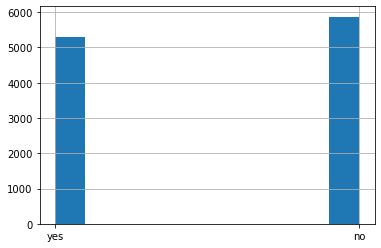

In [7]:
df['deposit'].hist()

Исходя из распределения видно что классы достаточно сбалансированны 

1.4 Проведите необходимую предобработку данных (preprocessing). Для построения моделей с помощью метрических методов все признаки должны быть закодированы числами.

Преобразование категориальных признаков проведем путём кодирования с помощью map()

In [8]:
new_values = {'yes':  1, 'no': 0} 
df['deposit1'] = df['deposit'].map(new_values)

In [9]:
df['housing1'] = df['housing'].map(new_values)

In [10]:
df['loan1'] = df['loan'].map(new_values)

In [11]:
df['default1'] = df['default'].map(new_values)
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [12]:
new_values_1 = {'cellular':  1, 'unknown': 0,'telephone' : 1 } 

df['contact1'] = df['contact'].map(new_values_1)
df['contact1'].value_counts()

1    8816
0    2346
Name: contact1, dtype: int64

In [13]:
new_values_2 = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec':12}
df['month1'] = df['month'].map(new_values_2)

In [14]:
df = df.drop(['deposit','housing','loan','default','contact', 'month'], axis = 1)

Для признаков имеющих больше двух параметров воспользуемся get_dummies()

In [15]:
df = pd.get_dummies(df, columns=['marital','poutcome','education'])
df.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
balance,2343,45,1270,2476,184
day,5,5,5,5,5
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
deposit1,1,1,1,1,1
housing1,1,0,1,1,0


1.5 Разбейте набор данных на обучающую и валидационную (тестовую) выборки с помощью метода train_test_split .

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('deposit1', axis=1).drop('job',axis = 1)
y = df['deposit1'] 


# Разделение
# test_size --- доля исходных данных, которую оставляем для валидации
# random_state --- произвольное целое число, для воспроизводимости случайных результатов

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   day                  11162 non-null  int64
 3   duration             11162 non-null  int64
 4   campaign             11162 non-null  int64
 5   pdays                11162 non-null  int64
 6   previous             11162 non-null  int64
 7   housing1             11162 non-null  int64
 8   loan1                11162 non-null  int64
 9   default1             11162 non-null  int64
 10  contact1             11162 non-null  int64
 11  month1               11162 non-null  int64
 12  marital_divorced     11162 non-null  uint8
 13  marital_married      11162 non-null  uint8
 14  marital_single       11162 non-null  uint8
 15  poutcome_failure     11162 non-null  uint8
 16  poutcome_other       1

In [17]:
print(X_train.shape, y_train.shape)

(8371, 23) (8371,)


In [18]:
print( X_valid.shape, y_valid.shape)

(2791, 23) (2791,)


1.6 Обучите алгоритм классификации KNeighborsClassifier. Оцените качество каждой модели на валидационной выборке с помощью accuracy_score. Сравните результаты и сделайте выводы.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_valid)

In [22]:
from sklearn.metrics import accuracy_score

knn.score(X_valid, y_valid) #вычисляем метрику качества

0.7298459333572196

In [23]:
print('Качество модели:', accuracy_score(y_pred, y_valid)) #другой способ для вычисления метрики

Качество модели: 0.7298459333572196


При использовании двух метрик мы получаем идентичный результат, следовательно модель качественная

2. Настройка оптимального числа ближайших 
соседей в методе kNN

2.1 Создайте генератор разбиений, который перемешивает выборку перед созданием блоков ( shuffle=True ). Число блоков n_splits равно 5. Задайте также параметр random_state для воспроизводимости результатов. Например: kf = KFold(n_splits=5, shuffle=True, random_state=42) Найдите показатель качества модели kNN на кросс-валидации. Подумайте, приемлемо ли использование вашей меры (метрики) качества в данной задаче? Прин еобходимости пересчитайте качество с помощью другой метрики из списка.

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print('Массив значений метрики:', scores)

Массив значений метрики: [0.74563368 0.74384236 0.7468638  0.76075269 0.73342294]


Приемлемо использовать данную метрику, так как качество модели от изменений метрики меняется не значительно

2.2 Осуществите кросс-валидацию модели при числе соседей k ∈ [1;50]. Используйте GridSearchCV . При каком k качество получилось наилучшим? Чему равна эта оценка качества? Постройте график значений метрики в зависимости от k ( matplotlib.pyplot.plot() ).

In [25]:
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 51)}
knn_grid = GridSearchCV(knn,knn_params, scoring = 'accuracy', cv=kf)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [26]:
knn_grid.best_estimator_ # Лучшая модель

KNeighborsClassifier(n_neighbors=27)

In [27]:
knn_grid.best_params_ # Лучшие значения параметров

{'n_neighbors': 27}

In [28]:
knn_grid.best_score_

0.7626335704987607

In [29]:
# Результаты кросс-валидации в виде таблицы
pd.DataFrame(knn_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
mean_fit_time,0.0210395,0.0210238,0.0210725,0.0210013,0.0210614,0.0211664,0.0212399,0.021091,0.0210969,0.021067,...,0.0195899,0.0208751,0.0196407,0.0194848,0.0202153,0.0195346,0.0194475,0.0193806,0.019387,0.0196177
std_fit_time,0.000169815,0.000101109,0.00013018,0.000151342,0.000213192,0.00018981,0.000268533,0.000240217,0.000199826,0.000146841,...,0.000338995,0.00287111,0.000135843,0.000279238,0.00192293,0.000109259,0.000280125,0.000133714,0.000140341,0.000642684
mean_score_time,0.0636056,0.0738261,0.0685264,0.069259,0.0707019,0.0716324,0.0729221,0.0734402,0.0750553,0.075317,...,0.0961693,0.101952,0.0971886,0.0963838,0.097413,0.0976408,0.0981605,0.103717,0.102289,0.105719
std_score_time,0.00141557,0.0143647,0.000463565,0.000238858,0.000564342,0.000398649,0.000454971,0.000464516,0.000464603,0.000503794,...,0.00390719,0.0116717,0.000825981,0.00089941,0.00185249,0.000778064,0.000759974,0.00601627,0.000358372,0.00576497
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},...,{'n_neighbors': 41},{'n_neighbors': 42},{'n_neighbors': 43},{'n_neighbors': 44},{'n_neighbors': 45},{'n_neighbors': 46},{'n_neighbors': 47},{'n_neighbors': 48},{'n_neighbors': 49},{'n_neighbors': 50}
split0_test_score,0.691343,0.678209,0.721194,0.715821,0.728955,0.734925,0.732537,0.736716,0.743881,0.748657,...,0.751642,0.746866,0.746269,0.739701,0.743284,0.740299,0.74209,0.739104,0.742687,0.740896
split1_test_score,0.716249,0.713262,0.750299,0.757467,0.757467,0.76583,0.760454,0.761051,0.762843,0.767025,...,0.763441,0.760454,0.764038,0.759259,0.763441,0.759259,0.764636,0.760454,0.761649,0.763441
split2_test_score,0.681601,0.677419,0.718041,0.721625,0.728196,0.732975,0.735364,0.737157,0.747312,0.746714,...,0.739546,0.738351,0.735364,0.737754,0.739546,0.739546,0.738949,0.738949,0.737157,0.734767
split3_test_score,0.702509,0.681004,0.741935,0.730585,0.755078,0.746714,0.764636,0.761051,0.771207,0.768817,...,0.764636,0.764038,0.765233,0.762843,0.767622,0.764636,0.766428,0.76822,0.76822,0.769415


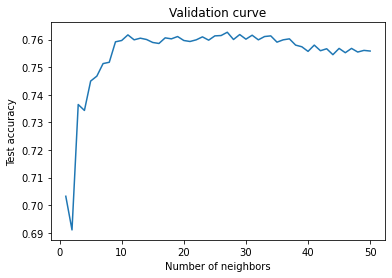

In [30]:
# Валидационная кривая
import matplotlib.pyplot as plt

results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

3. Выбор метрики в методе kNN 

3.1 Переберите разные варианты значений параметра p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (удобно использовать функцию numpy.linspace ). Используйте KNeighborsClassifier или KNeighborsRegressor с оптимальным значением n_neighbors , найденным ранее. Задайте опцию weights='distance' –– данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества снова используйте accuracy . Качество оценивайте с помощью кросс-валидации по 5 блокам.

In [31]:
p_params = {'p': np.linspace(1,10,200)}
knn = KNeighborsClassifier(n_neighbors=27, weights = 'distance', n_jobs = -1)
cv = GridSearchCV(knn, p_params, cv = kf, scoring='accuracy', verbose = 100)
cv.fit(X,y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.772, total=   1.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.764, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.762, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[CV] p=1.0 ...........................................................
[CV] ............................... p=1.0, score=0.783, total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | ela

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=27,
                                            weights='distance'),
             param_grid={'p': array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422...
        8.68844221,  8.73366834,  8.77889447,  8.8241206 ,  8.86934673,
        8.91457286,  8.95979899,  9.00502513,  9.05025126,  9.09547739,
        9.14070352,  9.18592965,  9.23115578,  9.27638191,  9.32160804,
        9.36683417,  9.4120603 ,  9.45728643,  9.50251256,  9.54773869,
        9.59296482,  9.63819095,  9.68341709,  9.72864322,  9.77386935,
        9.81909548,  9.86432161,  9.90954774,  9.95477387, 10.        ])},
             scoring='accuracy', verbose=100)

In [32]:

cv_result = pd.DataFrame(cv.cv_results_)
cv_result


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030149,0.002635,0.357938,0.619237,1,{'p': 1.0},0.772056,0.763995,0.762097,0.782706,0.763889,0.768948,0.007694,3
1,0.029221,0.000449,0.254370,0.006379,1.04523,{'p': 1.0452261306532664},0.771608,0.763995,0.761201,0.782258,0.764785,0.768769,0.007563,4
2,0.029283,0.000445,0.249398,0.004255,1.09045,{'p': 1.0904522613065326},0.772951,0.765338,0.761649,0.780466,0.762097,0.768500,0.007224,6
3,0.031114,0.003478,0.249338,0.016632,1.13568,{'p': 1.135678391959799},0.772503,0.765786,0.761649,0.781810,0.759857,0.768321,0.008025,8
4,0.029526,0.000259,0.235188,0.003045,1.1809,{'p': 1.1809045226130652},0.770712,0.764890,0.763441,0.782258,0.759857,0.768232,0.007838,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.030220,0.001844,0.172933,0.003187,9.8191,{'p': 9.819095477386934},0.763099,0.756829,0.763441,0.777330,0.756720,0.763484,0.007508,160
196,0.030848,0.002900,0.188634,0.027618,9.86432,{'p': 9.864321608040202},0.763099,0.756829,0.763441,0.777330,0.756720,0.763484,0.007508,160
197,0.029924,0.001164,0.173547,0.005911,9.90955,{'p': 9.909547738693467},0.763099,0.756829,0.763441,0.777330,0.756720,0.763484,0.007508,160
198,0.030265,0.001547,0.179091,0.015761,9.95477,{'p': 9.954773869346734},0.763099,0.756829,0.763441,0.776882,0.756720,0.763394,0.007344,181


In [33]:
cv.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=27, p=1.271356783919598,
                     weights='distance')

In [34]:
cv.best_score_

0.7692169590389836

3.2 Определите, при каком p качество на кросс-валидации оказалось оптимальным. Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей.

In [35]:
cv.best_params_

{'p': 1.271356783919598}

При p = 1.0452261306532664 качество на кросс-валидации оказалось оптимальным

4. Другие метрические методы

Поэкспериментируйте с другими метрическими методами для задач регрессии и классификации, представленными в библиотеке Scikit-learn: 
* RadiusNeighborsClassifier ; 
* RadiusNeighborsRegressor ; 
* NearestCentroid . 


Рассмотрим метод RadiusNeighborsClassifier

In [36]:
from sklearn.neighbors import RadiusNeighborsClassifier
def predy(r):
    neigh = RadiusNeighborsClassifier(radius=r)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_valid)
    return y_pred

accuracy_score(predy(1), y_valid)

1.0

Результат выглядит подозрительно хорошо, посмотрим результат на большей выборке радиусов

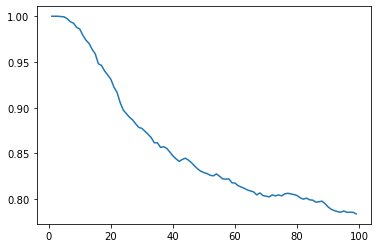

In [37]:
t = np.arange(1,100)
ac = [accuracy_score(predy(ts),y_valid) for ts in t  ]
plt.plot(t,ac)

Исходя из этого, в данной задаче эта модель - достаточно эффективна

Рассмотрим также метод NearestCentroid

In [38]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
NearestCentroid()
y_pred_nc = nc.predict(X_valid)
accuracy_score(y_valid, y_pred_nc)

0.582228591902544

Результат работы этого метода хуже чем в методе kNN. В данной задаче эта модель неэффективна